# Data Analysis

#### Import

In [152]:
import pandas as pd

direc1 = "..\public\data\cc_data.csv"
direc2 = "..\public\data\gps.csv"
direc3 = "..\public\data\car-assignments.csv"

df_cc = pd.read_csv(direc1)
df_gps = pd.read_csv(direc2)
df_employees = pd.read_csv(direc3)

In [153]:
df_gps["Timestamp"] = pd.to_datetime(df_gps['Timestamp'], infer_datetime_format=True)
df_gps

,Timestamp,id,lat,long
0,2014-01-06 06:28:01,35,36.076225,24.874689
1,2014-01-06 06:28:01,35,36.076220,24.874596
2,2014-01-06 06:28:03,35,36.076211,24.874443
3,2014-01-06 06:28:05,35,36.076217,24.874253
4,2014-01-06 06:28:06,35,36.076214,24.874167
...,...,...,...,...
685164,2014-01-19 20:56:43,30,36.058110,24.902130
685165,2014-01-19 20:56:47,30,36.058258,24.901774
685166,2014-01-19 20:56:48,30,36.058296,24.901711
685167,2014-01-19 20:56:49,30,36.058304,24.901620


In [154]:
df_cc["timestamp"] = pd.to_datetime(df_cc['timestamp'], infer_datetime_format=True)
df_cc

,timestamp,location,price,last4ccnum
0,2014-01-06 07:28:00,Brew've Been Served,11.34,4795
1,2014-01-06 07:34:00,Hallowed Grounds,52.22,7108
2,2014-01-06 07:35:00,Brew've Been Served,8.33,6816
3,2014-01-06 07:36:00,Hallowed Grounds,16.72,9617
4,2014-01-06 07:37:00,Brew've Been Served,4.24,7384
...,...,...,...,...
1485,2014-01-19 20:16:00,Guy's Gyros,37.48,9683
1486,2014-01-19 20:22:00,Katerina�s Caf�,38.90,9617
1487,2014-01-19 20:25:00,Guy's Gyros,20.94,3853
1488,2014-01-19 20:30:00,Guy's Gyros,31.94,4434


In [155]:
from datetime import datetime
from datetime import timedelta

In [156]:
df_gps = df_gps.set_index("Timestamp")
df_gps

,id,lat,long
Timestamp,,,
2014-01-06 06:28:01,35,36.076225,24.874689
2014-01-06 06:28:01,35,36.076220,24.874596
2014-01-06 06:28:03,35,36.076211,24.874443
2014-01-06 06:28:05,35,36.076217,24.874253
2014-01-06 06:28:06,35,36.076214,24.874167
...,...,...,...
2014-01-19 20:56:43,30,36.058110,24.902130
2014-01-19 20:56:47,30,36.058258,24.901774
2014-01-19 20:56:48,30,36.058296,24.901711


### Question 3 - Inferring the owners of cards

In [157]:
#list of those who move the most between an interval of n-minutes before and n-after the transaction
def get_candidates(timestamp):
    n_before = 10
    n_after = 6
    
    fulltime = timestamp.strftime("%Y-%m-%d, %H:%M:%S")
    dmy = fulltime[:10]
    ha = (timestamp - timedelta(minutes=n_before)).strftime("%m/%d/%Y, %H:%M:%S")[12:]
    hb1 = (timestamp + timedelta(minutes=1)).strftime("%m/%d/%Y, %H:%M:%S")[12:] #1 minute tolerance to start moving after the transaction 
    hb2 = (timestamp + timedelta(minutes=n_after)).strftime("%m/%d/%Y, %H:%M:%S")[12:]
    before_df = df_gps[dmy+" "+ha: fulltime]
    after_df = df_gps[dmy+" "+hb1: dmy+" "+hb2]
    filt_before = before_df['id'].unique()
    filt_after = after_df['id'].unique()
    flist = [x for x in filt_after if x not in filt_before]
    return flist

#### Credit Card

In [158]:
df_cc['candidates'] = df_cc['timestamp'].apply(get_candidates)

In [159]:
new_dfcc = pd.DataFrame(df_cc[["last4ccnum","candidates"]].groupby(("last4ccnum")).candidates.apply(sum))
new_dfcc

,candidates
last4ccnum,
1286,"[9, 22, 4, 7, 3, 1, 6, 27, 11, 2, 10, 17, 22, ..."
1310,"[16, 26, 20, 26, 18, 19, 20, 25, 26, 29, 12, 5..."
1321,"[5, 26, 6, 15, 5, 35, 3, 8, 29, 20, 26, 32, 11..."
1415,"[5, 26, 6, 15, 34, 1, 6, 2, 33, 22, 4, 2, 26, ..."
1874,"[16, 13, 22, 28, 14, 8, 3, 29, 19, 11, 21, 30,..."
1877,"[5, 26, 6, 15, 14, 18, 9, 24, 15, 25, 27, 12, ..."
2142,"[21, 29, 1, 5, 8, 19, 11, 21, 18, 14, 25, 22, ..."
2276,"[106, 106, 106, 106, 4, 34, 105, 9, 106, 29, 1..."
2418,"[30, 15, 9, 23, 104, 20, 2, 18, 22, 24, 5, 25,..."


In [160]:
from collections import Counter

def most_common(lista):
    data = Counter(lista)
    return data.most_common(1)[0][0]

new_dfcc['candidates'] = new_dfcc['candidates'].apply(most_common)
new_dfcc.reset_index(inplace=True)
new_dfcc

,last4ccnum,candidates
0,1286,22
1,1310,26
2,1321,11
3,1415,2
4,1874,14
5,1877,9
6,2142,25
7,2276,106
8,2418,30
9,2463,35


In [161]:
df_employees["CarID"] = df_employees["CarID"].apply(lambda x : int(x) if x > 0 else "NaN")
new_df_employees = df_employees.set_index('CarID').join(new_dfcc.set_index('candidates'))
new_df_employees["last4ccnum"] = new_df_employees["last4ccnum"].apply(lambda x : int(x) if x > 0 else "NaN")
new_df_employees.index.name="CarID"
new_df_employees

,LastName,FirstName,CurrentEmploymentType,CurrentEmploymentTitle,last4ccnum
CarID,,,,,
1,Calixto,Nils,Information Technology,IT Helpdesk,9551
2,Azada,Lars,Engineering,Engineer,1415
2,Azada,Lars,Engineering,Engineer,7117
3,Balas,Felix,Engineering,Engineer,9635
4,Barranco,Ingrid,Executive,SVP/CFO,7688
5,Baza,Isak,Information Technology,IT Technician,6899
6,Bergen,Linnea,Information Technology,IT Group Manager,7253
7,Orilla,Elsa,Engineering,Drill Technician,2540
8,Alcazar,Lucas,Information Technology,IT Technician,7889


In [162]:
new_df_employees1 = new_df_employees.reset_index().groupby(['CarID', "FirstName", "LastName", "CurrentEmploymentType", "CurrentEmploymentTitle"])
result = new_df_employees1["last4ccnum"].unique()
result

CarID  FirstName  LastName        CurrentEmploymentType   CurrentEmploymentTitle      
1      Nils       Calixto         Information Technology  IT Helpdesk                                       [9551]
2      Lars       Azada           Engineering             Engineer                                    [1415, 7117]
3      Felix      Balas           Engineering             Engineer                                          [9635]
4      Ingrid     Barranco        Executive               SVP/CFO                                           [7688]
5      Isak       Baza            Information Technology  IT Technician                                     [6899]
6      Linnea     Bergen          Information Technology  IT Group Manager                                  [7253]
7      Elsa       Orilla          Engineering             Drill Technician                                  [2540]
8      Lucas      Alcazar         Information Technology  IT Technician                                     

### Question 4 - Inferring informal or unofficial relationships amongs GASTech personnel

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

coords_df = df_gps.reset_index().iloc[:,1:]
coords_df

,id,lat,long
0,35,36.076225,24.874689
1,35,36.076220,24.874596
2,35,36.076211,24.874443
3,35,36.076217,24.874253
4,35,36.076214,24.874167
...,...,...,...
685164,30,36.058110,24.902130
685165,30,36.058258,24.901774
685166,30,36.058296,24.901711
685167,30,36.058304,24.901620


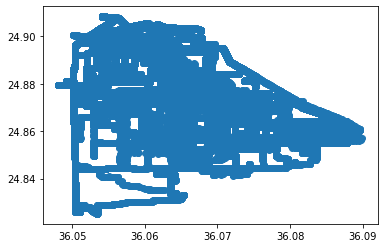

In [180]:
plt.scatter(coords_df.values[:,1],coords_df.values[:,2])
plt.show()